In [1]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
import copy

In [3]:
full_df = pd.read_csv("../Data/Movie_data/sequel_movie.csv", thousands=",", low_memory=False, error_bad_lines=False)
full_df['genre'] = full_df.genre.str.strip()
# full_df['total'] = full_df.iloc[:,10:14].sum(axis=1)

In [4]:
# test = pd.read_csv("../Data/fbi_hate_crime_2013_table13.csv", low_memory=False, error_bad_lines=False)

In [5]:
full_df.columns

Index(['genre', 'director', 'actor1', 'gross', 'year', 'runtime', 'actor4',
       'popularity', 'meta_score', 'actor2', 'rating', 'votes', 'actor3',
       'title', 'description', 'user_score'],
      dtype='object')

In [6]:
def getOne_genre(row):
    try:
        return row[0].rstrip(',')
    except TypeError:
        pass
full_df['main_genre'] = full_df.genre.str.split().apply(getOne_genre)  

In [41]:
print('rows of full df: ', len(full_df))
df = full_df[(full_df.main_genre == 'Action')|(full_df.main_genre == 'Adventure')|(full_df.main_genre == 'Animation')|\
             (full_df.main_genre == 'Comedy')|(full_df.main_genre == 'Crime')|(full_df.main_genre == 'Documentary')|\
             (full_df.main_genre == 'Drama')|(full_df.main_genre == 'Horror')]
print('rows of df: ', len(df))
df = df[(df.rating != 'Not Rated')]
df = df[(df.rating !='X')]
df = df[(df.rating != 'Unrated')]        
print('rows of df: ', len(df))
df = df[df.gross>0]
print('rows of df: ', len(df))
df = df[df.meta_score>=0]
print('rows of df: ', len(df))

rows of full df:  4187
rows of df:  3734
rows of df:  3494
rows of df:  739
rows of df:  476


In [42]:
group_names = ['25_low_pct', '50_mid_pct', '75_mid_pct', 'high_100_pct']
df['popularity_cat'] = pd.cut(df.popularity, 4, labels=group_names)
df['meta_score_cat'] = pd.cut(df.meta_score, 4, labels=group_names)

In [43]:
df1 = df[df.meta_score >=50]
df2 = df[df.meta_score < 50]

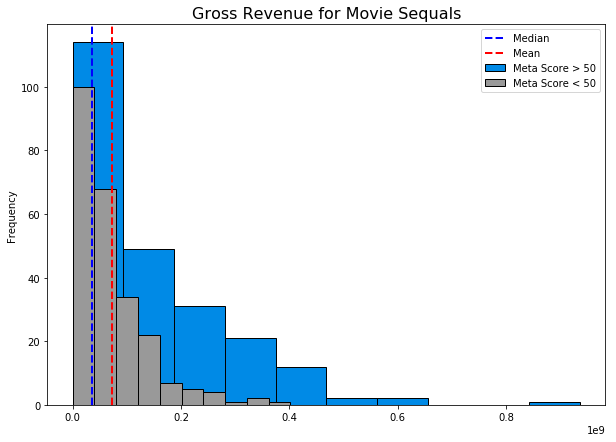

In [66]:
df1.gross.plot.hist(bins=10, color='#008ae6', label = 'Meta Score > 50', figsize = (10,7), ec='black')
df2.gross.plot.hist(bins=10, color='#999999', label = 'Meta Score < 50', figsize = (10,7), ec='black')
plt.axvline(full_df.gross.median(), color='b', linestyle='dashed', linewidth=2, label='Median')
plt.axvline(full_df.gross.mean(), color='r', linestyle='dashed', linewidth=2, label='Mean')
plt.legend(loc='upper right')
plt.title('Gross Revenue for Movie Sequals', fontsize=16)

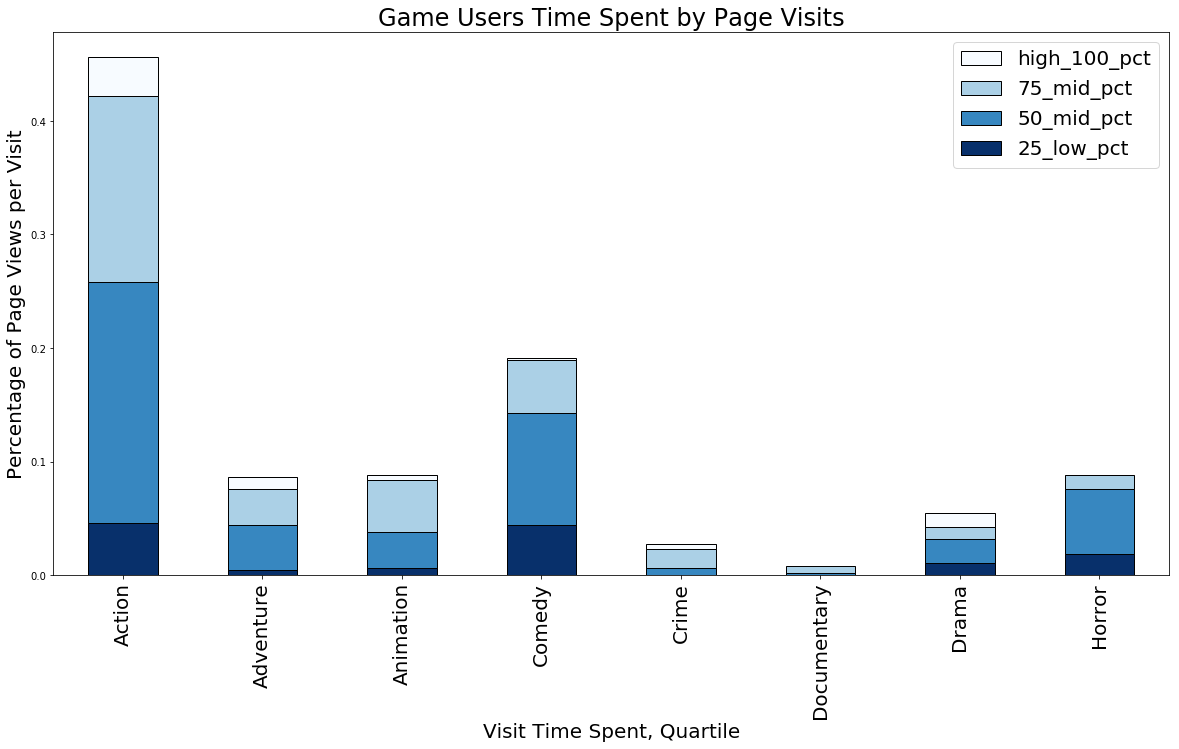

In [54]:
frame = pd.crosstab( df.main_genre,df.meta_score_cat, normalize=True).sort_index()
ax = frame.plot(kind='bar', figsize=(20,10),colormap="Blues_r", ec='black', stacked=True)
handles, labels = ax.get_legend_handles_labels()
ax.legend(reversed(handles), reversed(labels), loc='upper right', fontsize=20)  # reverse both handles and labels
plt.title('Game Users Time Spent by Page Visits', fontsize=24)
plt.xticks(fontsize=20)
plt.xlabel('Visit Time Spent, Quartile', fontsize=20)
plt.ylabel('Percentage of Page Views per Visit', fontsize=20)

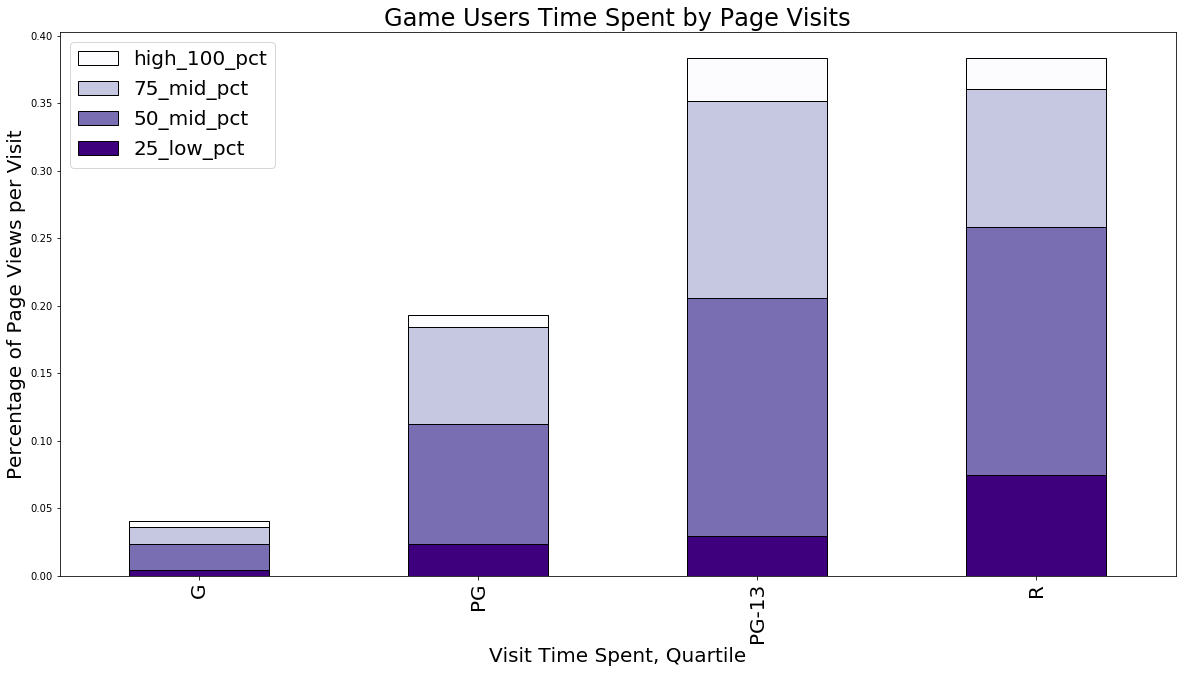

In [49]:
frame = pd.crosstab( df.rating,df.meta_score_cat, normalize=True).sort_index()
ax = frame.plot(kind='bar', figsize=(20,10),colormap="Purples_r", ec='black', stacked=True)
handles, labels = ax.get_legend_handles_labels()
ax.legend(reversed(handles), reversed(labels), loc='best', fontsize=20)  # reverse both handles and labels
plt.title('Game Users Time Spent by Page Visits', fontsize=24)
plt.xticks(fontsize=20)
plt.xlabel('Visit Time Spent, Quartile', fontsize=20)
plt.ylabel('Percentage of Page Views per Visit', fontsize=20)

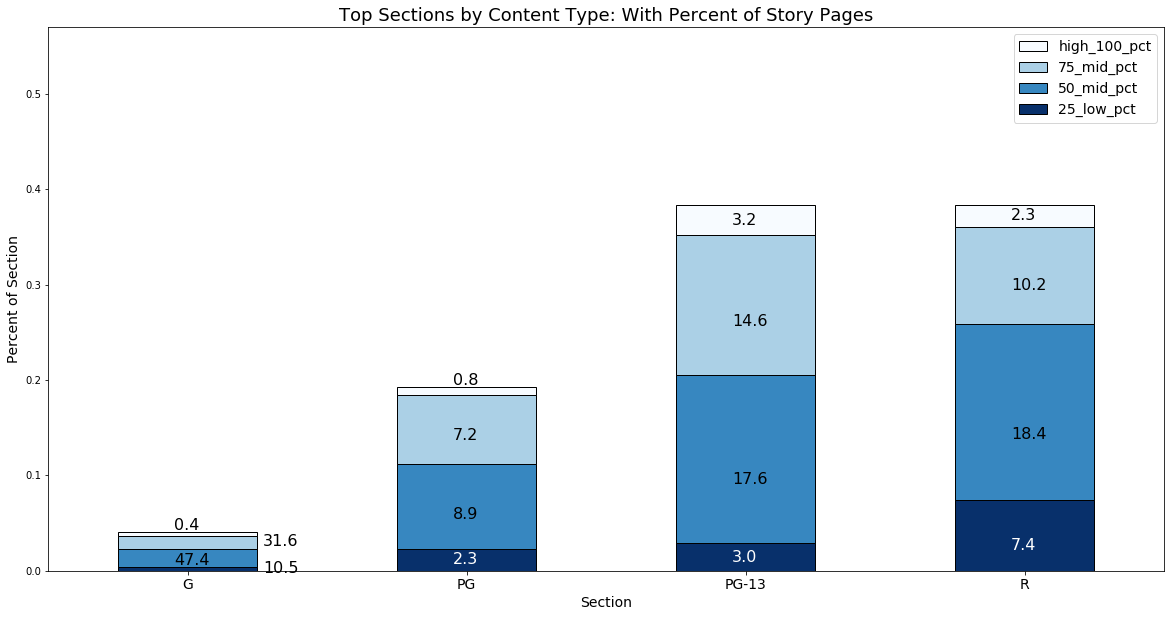

In [98]:
frame = pd.crosstab(df.rating,df.meta_score_cat, normalize=True)
ax = frame.plot(kind='bar',table=False, ylim=(0,.57), figsize=(20,10), stacked=True, colormap = 'Blues_r', ec ='black')
handles, labels = ax.get_legend_handles_labels()
ax.legend(reversed(handles), reversed(labels), loc='best', fontsize=14)  # reverse both handles and labels
plt.title('Top Sections by Content Type: With Percent of Story Pages', fontsize=18)
plt.xticks(rotation=0, fontsize=14)
plt.ylabel('Percent of Section', fontsize=14)
plt.xlabel('Section', fontsize=14)
count_index = 0
for i, each in enumerate(frame.index):
    count_iters = 0
    count = 0
    count_index +=1

    for col in frame.columns:
        y = frame.loc[each][col] 
        h = y+ count
        if (i > 0):


            count = count + y
            count_iters +=1
            pct_of_story = frame[col]/frame[col].sum()
            pct_of_col = frame.iloc[count_index-1,:]/frame.iloc[count_index-1,:].sum()
            if count_iters < len(frame.columns)-2:
                ax.text(i-.05, h-(y*.7), round(y,3)*100,fontsize=16, color='white')
            else:
                if (col == 'high_100_pct')&(y<.01):
                    ax.text(i-.05, h+.002, round(y,3)*100,fontsize=16, color='black')

                else:
                    ax.text(i-.05, h-y*.65, round(y,3)*100,fontsize=16, color='black')
        else:
            count = count + y
            count_iters +=1
            pct_of_story = frame[col]/frame[col].sum()
            pct_of_col = frame.iloc[count_index-1,:]/frame.iloc[count_index-1,:].sum()

            if (col=='75_mid_pct')|(col =='25_low_pct') :
                ax.text(i+.27, h-(y*.5)-.004, round(pct_of_col[col],3)*100,fontsize=16, color='black')
            else:
                if (col == 'high_100_pct')&(y<.01):
                    ax.text(i-.05, h+.003, round(y,3)*100,fontsize=16, color='black')
                else:
                    ax.text(i-.05, h-(y*.7)-.004, round(pct_of_col[col],3)*100,fontsize=16, color='black')


In [105]:
def plot_pct_users(var, X_label, df_1=df1, df_1_name = 'Meta Score > 50', df_2=df2, df_2_name = 'Meta Score < 50', ylim_max=1):
    fig = plt.figure(figsize=(10, 6))

    for frame in [ [df_2, df_2_name, '#999999'], [df_1, df_1_name, '#008ae6'] ]:
        frame[0][var].value_counts(normalize=True).sort_index().plot(kind='bar',alpha=0.65,  label=frame[1],color=frame[2], ec='black')

    plt.xlim(-1,len(df_2[var].value_counts()))
    plt.ylim(0,ylim_max)
    plt.legend(loc='upper right')
    plt.xlabel(X_label, fontsize=14)
    plt.ylabel('Perecntage of Respondents', fontsize=14)
    plt.title(X_label + ' by Games or Non-Games Users', fontsize=16)

    plt.show()

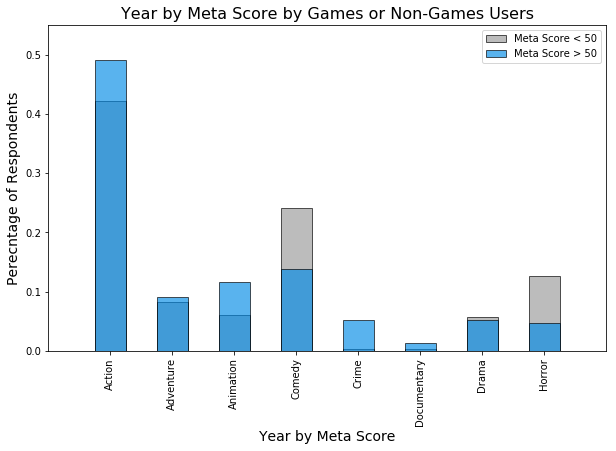

In [110]:
plot_pct_users('main_genre', 'Year by Meta Score',  ylim_max=.55)

In [34]:
df.rating.value_counts()

PG-13        183
R            181
PG            93
G             19
Not Rated      7
Unrated        3
Approved       1
X              1
Name: rating, dtype: int64

In [13]:
df.popularity_cat.value_counts()

25_low_pct      393
50_mid_pct       85
high_100_pct      5
75_mid_pct        4
Name: popularity_cat, dtype: int64

In [147]:
pd.crosstab( df1.meta_score_cat,df1.rating, normalize=True)

rating,Approved,G,Not Rated,PG,PG-13,R,Unrated,X
meta_score_cat,,,,,,,,
25_low_pct,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50_mid_pct,0.000000,0.000000,0.000000,0.015810,0.039526,0.051383,0.000000,0.000000
75_mid_pct,0.000000,0.023715,0.027668,0.150198,0.284585,0.241107,0.011858,0.003953
high_100_pct,0.003953,0.007905,0.007905,0.027668,0.059289,0.043478,0.000000,0.000000
